In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import datetime
import scipy.stats as st

In [2]:
path = 'EmployeeAttrition.csv'
df = pd.read_csv(path)
df

,MMM-YY,Emp_ID,Age,Gender,City,Education_Level,Salary,Dateofjoining,LastWorkingDate,Joining Designation,Designation,Total Business Value,Quarterly Rating
0,2016-01-01,1,28,Male,C23,Master,57387,2015-12-24,NaN,1,1,2381060,2
1,2016-02-01,1,28,Male,C23,Master,57387,2015-12-24,NaN,1,1,-665480,2
2,2016-03-01,1,28,Male,C23,Master,57387,2015-12-24,2016-03-11,1,1,0,2
3,2017-11-01,2,31,Male,C7,Master,67016,2017-11-06,NaN,2,2,0,1
4,2017-12-01,2,31,Male,C7,Master,67016,2017-11-06,NaN,2,2,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
19099,2017-08-01,2788,30,Male,C27,Master,70254,2017-06-08,NaN,2,2,740280,3
19100,2017-09-01,2788,30,Male,C27,Master,70254,2017-06-08,NaN,2,2,448370,3
19101,2017-10-01,2788,30,Male,C27,Master,70254,2017-06-08,NaN,2,2,0,2
19102,2017-11-01,2788,30,Male,C27,Master,70254,2017-06-08,NaN,2,2,200420,2


In [3]:
# Create separate dfs for each designation

des1_df = df.loc[df['Designation']==1,:]
des2_df = df.loc[df['Designation']==2,:]
des3_df = df.loc[df['Designation']==3,:]
des4_df = df.loc[df['Designation']==4,:]
des5_df = df.loc[df['Designation']==5,:]
des1_df.head()

,MMM-YY,Emp_ID,Age,Gender,City,Education_Level,Salary,Dateofjoining,LastWorkingDate,Joining Designation,Designation,Total Business Value,Quarterly Rating
0,2016-01-01,1,28,Male,C23,Master,57387,2015-12-24,NaN,1,1,2381060,2
1,2016-02-01,1,28,Male,C23,Master,57387,2015-12-24,NaN,1,1,-665480,2
2,2016-03-01,1,28,Male,C23,Master,57387,2015-12-24,2016-03-11,1,1,0,2
10,2016-01-01,5,29,Male,C9,College,46368,2016-01-09,NaN,1,1,0,1
11,2016-02-01,5,29,Male,C9,College,46368,2016-01-09,NaN,1,1,120360,1


In [4]:
# group dfs by quartley rating and get mean total business value
# eg. level 4 should make x amount to receive high rating
pd.options.display.float_format = '{:.2f}'.format
d1_gr = des1_df.groupby('Quarterly Rating')['Total Business Value'].mean()
d2_gr = des2_df.groupby('Quarterly Rating')['Total Business Value'].mean()
d3_gr = des3_df.groupby('Quarterly Rating')['Total Business Value'].mean()
d4_gr = des4_df.groupby('Quarterly Rating')['Total Business Value'].mean()
d5_gr = des5_df.groupby('Quarterly Rating')['Total Business Value'].mean()
print(d1_gr)
print(d5_gr)

Quarterly Rating
1     48940.26
2    309147.31
3    583645.68
4   1265602.71
Name: Total Business Value, dtype: float64
Quarterly Rating
1    101233.31
2   1330368.51
3   2621984.65
4   4839064.36
Name: Total Business Value, dtype: float64


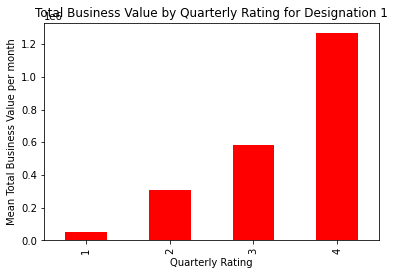

In [5]:
pd.options.display.float_format = '{:.2f}'.format
# Why won't this display the correct values on y axis? They are printed correctly above.

Fig_d1 = d1_gr.plot(kind='bar', facecolor='red',title='Total Business Value by Quarterly Rating for Designation 1')
Fig_d1.set_xlabel('Quarterly Rating')
Fig_d1.set_ylabel('Mean Total Business Value per month')
xtick=d1_gr.index
plt.show()

In [6]:
# problem cell above - y axis values
# repeat code to get all designations on plot (different color per designation)

In [7]:
# get salary information per designation

ind_des1_df = des1_df.groupby('Emp_ID')
d1_salary = ind_des1_df['Salary'].mean()

ind_des2_df = des2_df.groupby('Emp_ID')
d2_salary = ind_des2_df['Salary'].mean()

ind_des3_df = des3_df.groupby('Emp_ID')
d3_salary = ind_des3_df['Salary'].mean()

ind_des4_df = des4_df.groupby('Emp_ID')
d4_salary = ind_des4_df['Salary'].mean()

ind_des5_df = des5_df.groupby('Emp_ID')
d5_salary = ind_des5_df['Salary'].mean()

d1_salary


Emp_ID
1       57387
5       46368
11      42172
12      28116
17      51099
        ...  
2773    35607
2774    42313
2782    29582
2785    12105
2787    69498
Name: Salary, Length: 751, dtype: int64

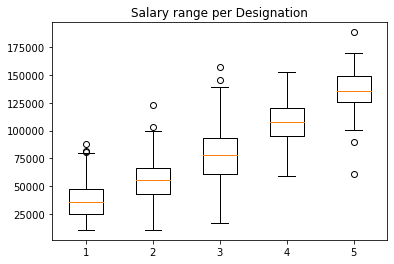

In [9]:
data = [d1_salary, d2_salary, d3_salary, d4_salary, d5_salary]
fig2,ax1 = plt.subplots()
ax1.set_title('Salary range per Designation')
ax1.boxplot(data)

plt.show()

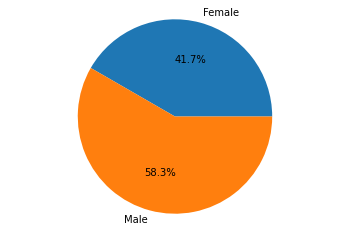

In [13]:
# gender % per designation pie charts

s_d1 = des1_df.sort_values(["MMM-YY",'Emp_ID'], ascending = False)
s_d1 = des1_df.drop_duplicates(subset = 'Emp_ID', keep = 'first').reset_index(drop = True)

s_d2 = des2_df.sort_values(["MMM-YY",'Emp_ID'], ascending = False)
s_d2 = des2_df.drop_duplicates(subset = 'Emp_ID', keep = 'first').reset_index(drop = True)

s_d3 = des3_df.sort_values(["MMM-YY",'Emp_ID'], ascending = False)
s_d3 = des3_df.drop_duplicates(subset = 'Emp_ID', keep = 'first').reset_index(drop = True)

s_d4 = des4_df.sort_values(["MMM-YY",'Emp_ID'], ascending = False)
s_d4 = des4_df.drop_duplicates(subset = 'Emp_ID', keep = 'first').reset_index(drop = True)

s_d5 = des5_df.sort_values(["MMM-YY",'Emp_ID'], ascending = False)
s_d5 = des5_df.drop_duplicates(subset = 'Emp_ID', keep = 'first').reset_index(drop = True)

gen_d1 = s_d1.groupby('Gender').count()
gen_d2 = s_d2.groupby('Gender').count()
gen_d3 = s_d3.groupby('Gender').count()
gen_d4 = s_d4.groupby('Gender').count()
gen_d5 = s_d5.groupby('Gender').count()
gen_d5

#plot d1 pie chart 
labels = ['Female','Male']
plt.pie(gen_d1['Emp_ID'], labels=labels,autopct="%1.1f%%")
plt.axis('equal')
plt.show()